# Ethical AI - Checking for bias 

A machine learning model makes predictions of an outcome for a particular instance. For example, given an instance of a loan application, we can predict if the applicant will repay the loan. The model makes these predictions based on a training dataset, where many other instances (other loan applications) and actual outcomes (whether they repaid) are provided. 

Thus, a machine learning algorithm will attempt to find patterns, or generalizations, in the training dataset to predict the outcome of a new instance. For example, one pattern it might discover is "if a person has salary > EUR 40K and has outstanding debt < EUR 5, they will repay the loan". 

However, sometimes the patterns that are found may not be desirable or may even be illegal. For example, a loan repay model may determine that age plays a significant role in the prediction of repayment because the training dataset happened to have better repayment for one age group than for another. 

This raises two problems: 
1. the dataset may not be representative of the true population of people of all age groups, and 
2. even if it is representative, it is **illegal to base any decision on a applicant's age**, regardless of whether this is a good prediction based on historical data.

In this tutorial, we demonstrate how we can check whether bias exists in a dataset. 

This tutorial borrows heavily from the following paper:

* Bellamy, R. K., Dey, K., Hind, M., Hoffman, S. C., Houde, S., Kannan, K., ... & Nagar, S. (2018). AI Fairness 360: An extensible toolkit for detecting, understanding, and mitigating unwanted algorithmic bias. arXiv preprint arXiv:1810.01943.

### Loading modules

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline

### Data description

The original dataset contains 1000 entries with 20 categorial/symbolic attributes prepared by Prof. Hans Hofmann from the University of Hamburg (https://archive.ics.uci.edu/ml/datasets/Statlog+%28German+Credit+Data%29). 

In this dataset, each entry represents a person who takes a credit by a bank. The key measure is "Credit repaid", i.e., whether the person eventually repays the credit. Using this dataset, a bank manager can train a model based on which he or she can approve future credit applications automatically by the applicant's features.

In [2]:
df = pd.read_csv('german_credit_data.csv')
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Foreign worker,Credit repaid
0,67,male,2,own,NaN,little,1169,6,radio/TV,yes,yes
1,22,female,2,own,little,moderate,5951,48,radio/TV,yes,no
2,49,male,1,own,little,NaN,2096,12,education,yes,yes
3,45,male,2,free,little,little,7882,42,furniture/equipment,yes,yes
4,53,male,2,free,little,little,4870,24,car,yes,no


### Define favorable outcome and protected feature

In order to check for bias in the dataset, we need to first define:

* *What is the favorable outcome?* Since we use "Credit repaid" as the prediction outcome based on which future loans are approved, 'Credit repaid = yes' will be the favorable outcome.
* *What is the protected feature?* In this example, we will define applicants under age of 25 as an underprivileged group.

We will then recode the features into numeric types.

In [3]:
def apply_agegroup(age):
    if age > 25:
        return 1
    else:
        return 0

In [4]:
def apply_credit(credit):
    if credit == "yes":
        return 1
    else:
        return 0

In [5]:
df['age_group'] = df['Age'].apply(apply_agegroup)

In [6]:
df['credit'] = df['Credit repaid'].apply(apply_credit)

### Visually examine the outcome

Does the underprivileged group (i.e. applicants aged < 25) perform differently than the privileged group? We first plot the outcome of the two groups. Apparently, young people on average has lower rate of favorable outcome.

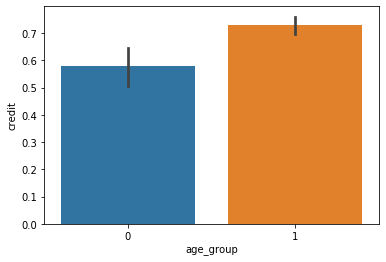

In [7]:
sns.barplot(x='age_group', y='credit', data=df)

### Calculating bias metric

Finally, we want to quantify the extent of bias. There are many ways to calculate bias metric, one of which is **disparate impact**, computed as the ratio of rate of favorable outcome for the unprivileged group to that of the privileged group.

The ideal value of this metric is 1.0. A value < 1 implies higher benefit for the privileged group and a value >1 implies a higher benefit for the unprivileged group. It has been proposed that **fairness for this metric is between 0.8 and 1.2**.

In [7]:
df.groupby('age_group').mean()['credit']

age_group
0    0.578947
1    0.728395
Name: credit, dtype: float64

In [8]:
underprivileged = df[df['age_group'] == 0]['credit'].mean()
privileged = df[df['age_group'] == 1]['credit'].mean()

In [9]:
disparate_impact = underprivileged / privileged
disparate_impact

0.7948260481712757

### What next?

Now that we have found out that using this dataset to train a prediction model may lead to bias against underprivileged group (i.e., young people), what should we do?

In the next tutorial, we will discuss ways to mitigate this potential bias.